# Demo 1: Fractals (Part 3)

In [1]:
import numpy as np
import torch

In [2]:
print("PyTorch Version :\t", torch.__version__)
print("CUDA Available? :\t", torch.cuda.is_available())

PyTorch Version :	 2.0.1+cu118
CUDA Available? :	 True


## Heighway Dragon

The dragon curve is a family of self-similar fractal curves<sup>1</sup>. The 
Heighway dragon is a particular dragon curve formed initially from a single line 
segment by repeatedly replacing each segment by two segments with a right angle
and with a rotation of 45 $^\circ$ alternately to the right and to the 
left<sup>1</sup>. The Heighway dragon is also the limit set of the following
iterated function system in the complex plane<sup>1</sup>:

$\quad f_1(z) = \frac{(1+i)z}{2}$

$\quad f_2(z) = 1 - \frac{(1-i)z}{2}$

with the initial set of points $S_0 = \{0, 1\}$.

An iterated function system (IFS) is a method of constructing fractals according
to a set of rules. A common computational method for the construction of an IFS
relies on probabilistic marking of the space occupied by the fractal according
to the evolutionary rules of the IFS. A common example is the 
[chaos game](https://en.wikipedia.org/wiki/Chaos_game), often used to
demonstrate construction of the Sierpinsky triangle.

In [45]:
f1 = lambda z:     0.5 * z * torch.tensor(1 + 1j, device="cuda")
f2 = lambda z: 1 - 0.5 * z * torch.tensor(1 - 1j, device="cuda")

S = torch.tensor([0, 1], device="cuda")

for i in range(15):
    S = torch.cat([S, f1(S), f2(S)])

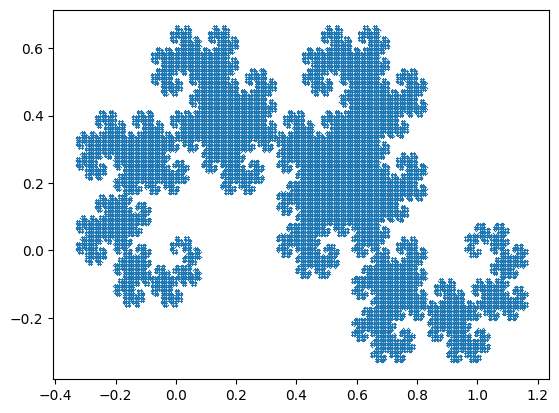

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

_z = S.to("cpu")
sns.scatterplot(x=torch.real(_z), y=torch.imag(_z), ax=ax, linewidth=0, s=1)

plt.show()

## References

[1] Wikipedia. "Dragon curve." Wikipedia.org (accessed Aug. 7, 2023).

[2] Wikipedia. "Iterated function system." Wikipedia.org (accessed Aug, 7, 2023).